In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Autorizar el acceso a tu propia cuenta de google drive, 
# siga el enlace, acepte y copie el codigo de verificación.

In [ ]:
#Carpeta de modelos -> 1yAewv32rCMrtP5knpc-mZe0lMWvtLsIf


YOUR_FILE_ID = '1yAewv32rCMrtP5knpc-mZe0lMWvtLsIf' 
filename = 'ModelosProyectoFinal.zip'

download = drive.CreateFile({'id': YOUR_FILE_ID})
download.GetContentFile(filename)

import zipfile
zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#Resultados de prediccion para los modelos
from keras.applications.resnet50 import resnet50, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
from keras.models import load_model


#Carga de modelos 
print('Esto podria tomar algunos segundos... :)')
Inception = load_model('/content/ModelosProyectoFinal/Modelos/InceptionAnimal.h5')
Resnet = load_model('/content/ModelosProyectoFinal/Modelos/ResNetAnimal.h5')
vgg16 = load_model('/content/ModelosProyectoFinal/Modelos/VGG16Animal.h5')

Using TensorFlow backend.


Esto podria tomar algunos segundos... :)


In [ ]:
#Funcion pre-ajuste para cualquier imagen de prueba
def prepare(filepath,model_name):

  #El tamaño de imagen de entrada y el preprocesamiento cambia de modelo en modelo
    if model_name in ("InceptionAnimal", "Vgg16"): 
        inputShape = (150, 150)
    if model_name in ("ResNetAnimal"):
        inputShape = (200, 200)
    img = load_img(imgprueba, target_size=(inputShape)) 
    img = img_to_array(img)
    img=img/255.0
    img = np.expand_dims(img, 0)
    return img

#Las categorias se acomodan por deafult en orden alfabetico
CATEGORIES=['Bear','Bird','Elephant', 'Horse', 'Leopard', 'Lion', 'Shark', 'Wolf']

Shark Inception Predict = 99.991024 %
[(99.99102, 'Shark'), (0.0057909447, 'Bear'), (0.0016797492, 'Wolf')]
execution time = 0.00017499923706054688


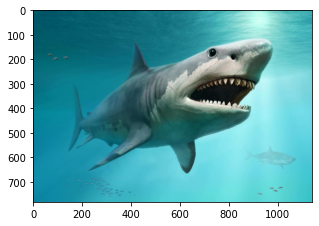

In [ ]:
#Prediccion papra inception

import matplotlib.pyplot as plt
from PIL import Image
import time
import heapq as hp

# img tiburon -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg
# img pajaro -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/Pajaro-1220x692.jpg
# img caballo -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/caballo-evolucion.jpg
# img oso -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/oso1.jpg
# img leon -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/leon.jpg



#Path de imagen de prueba
imgprueba='/content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg' 
model_name='InceptionAnimal'

preprocess=prepare(imgprueba, model_name)

res=Inception.predict(preprocess)

#Se declara la lista de resultados
lista2=res[0]

#Se obtiene le numero mayor 
resultado=max(lista2)

#Ciclo para obtener indice del numero mayor
i=0
for x in lista2:
  if lista2[i] == resultado:
     posicion=i
  i=i+1

print(CATEGORIES[posicion] + ' Inception Predict = %f' %(resultado*100)+' %')
t0 = time.time()

#Impresion del top 3 
tupla= hp.nlargest(3,zip(lista2*100,CATEGORIES))
print(tupla)
print('execution time =', time.time()-t0)

img2=Image.open(imgprueba)
plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.show()

Shark ResNet Predict = 99.999857 %
[(99.999855, 'Shark'), (5.1488565e-05, 'Bear'), (3.373069e-05, 'Elephant')]
execution time = 0.0001735687255859375


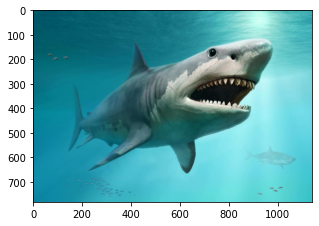

In [ ]:
#Prediccion papra ResNet


# img tiburon -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg
# img pajaro -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/Pajaro-1220x692.jpg
# img caballo -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/caballo-evolucion.jpg

#Path de imagen de prueba
#imgprueba='/content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg' 

#Se tene que cambiar el nombre de modelo a utilizar
model_name='ResNetAnimal'

preprocess=prepare(imgprueba, model_name)

res=Resnet.predict(preprocess)
lista2=res[0]
resultado=max(lista2)

#Ciclo for para obtener indice del numero mayor
i=0
for x in lista2:
  if lista2[i] == resultado:
     posicion=i
  i=i+1

print(CATEGORIES[posicion] + ' ResNet Predict = %f' %(resultado*100)+' %')
t0 = time.time()

tupla= hp.nlargest(3,zip(lista2*100,CATEGORIES))
print(tupla)
print('execution time =', time.time()-t0)


img2=Image.open(imgprueba)
plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.show()

Shark Vgg16 Predict = 98.778743 %
[(98.77874, 'Shark'), (1.0650249, 'Horse'), (0.1424103, 'Bird')]
execution time = 0.0002186298370361328


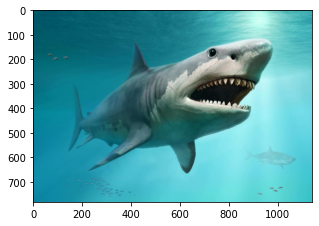

In [ ]:
#Prediccion papra Vgg16

# img tiburon -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg
# img pajaro -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/Pajaro-1220x692.jpg
# img caballo -> /content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/caballo-evolucion.jpg

#Path de imagen de prueba
#imgprueba='/content/ModelosProyectoFinal/ImagenesPrueba/ImagenesPrueba/ImagenesPrueba/tiburon1_0.jpg' 
model_name='Vgg16'

preprocess=prepare(imgprueba, model_name)

res=vgg16.predict(preprocess)
lista2=res[0]
resultado=max(lista2)

#Ciclo for para obtener indice del numero mayor
i=0
for x in lista2:
  if lista2[i] == resultado:
     posicion=i
  i=i+1

print(CATEGORIES[posicion] + ' Vgg16 Predict = %f' %(resultado*100)+' %')
t0 = time.time()

tupla= hp.nlargest(3,zip(lista2*100,CATEGORIES))
print(tupla)
print('execution time =', time.time()-t0)

img2=Image.open(imgprueba)
plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.show()